In [172]:
import pandas as pd
import numpy as np
import tqdm.auto as tqdm
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
class TruthTable:

    def __init__(self, variables, logical_rules):

        self.variables = variables
        self.logical_rules = logical_rules

        self.logical_options = [True, False]
        self.variable_permuations = lambda : itertools.product(self.logical_options, repeat=len(self.variables))

        self.logical_results = self.apply_logical_rules()

        self.table = self.build_table()


    def apply_logical_rules(self):
        
        logical_rules_output = {rule_str: [] for rule_str, rule_func in self.logical_rules}

        for vars in self.variable_permuations():

            for rule_str, rule_func in self.logical_rules:

                logical_output = rule_func(*vars)
                logical_rules_output[rule_str].append(logical_output)
        
        return logical_rules_output


    def build_table(self):

        output_dict = {}

        variable_table = np.array([[var for var in row] for row in self.variable_permuations()])
        for i, variable in enumerate(self.variables):
            
            variable_values = variable_table[:, i]
            output_dict.update({variable: variable_values})
        
        for (rule_str, rule_func), logical_result in zip(self.logical_rules, self.logical_results.values()):
            

            output_dict.update({rule_str: logical_result})
        
        output_frame = pd.DataFrame(output_dict)

        return output_frame

    def display_table(self):

        fig, axs = plt.subplots(1,1, figsize=(25, 5))

        data = self.table.values
        sns.heatmap(data, cmap='YlGnBu', linewidths=0.5, linecolor='gray', square=True, cbar=True)

        x_labels = self.variables + [rule_str for rule_str, rule_fn in self.logical_rules]
        plt.xticks(np.arange(len(x_labels)) + 0.5, x_labels, rotation=90)
        
        plt.show()


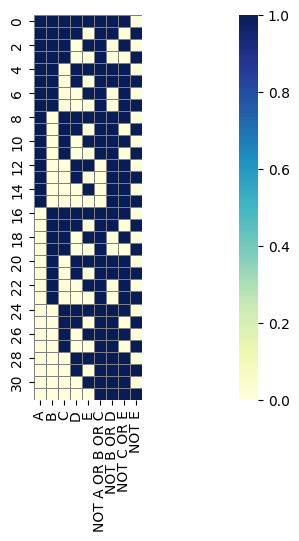

In [208]:
# Problem 1
# KB:
# A --> (B OR C)  <--> NOT A OR B OR C
# B --> D  <-->  NOT B OR D
# C --> E  <--> NOT C OR E
# GOAL: Derive E

variables = ['A', 'B', 'C', 'D', 'E']

logical_rules = [
    ("NOT A OR B OR C", lambda A, B, C, D, E: not A or B or C,),
    ("NOT B OR D", lambda A, B, C, D, E: not B or D,),
    ("NOT C OR E", lambda A, B, C, D, E: not C or E,),
    ("NOT E", lambda A, B, C, D, E: not E,),
]

truth_table = TruthTable(variables, logical_rules)
truth_table.display_table()

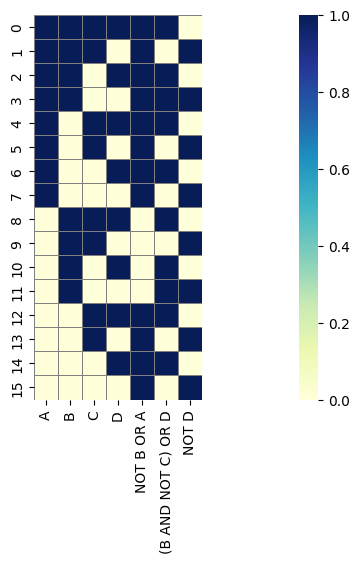

In [209]:
# Problem 2
# KB:
# (B --> A) <--> NOT B OR A
# (B --> C) --> D <--> (B AND NOT C) OR D
# GOAL: Derive D

variables = ['A', 'B', 'C', 'D']

logical_rules = [
    ("NOT B OR A", lambda A, B, C, D: not B or A),
    ("(B AND NOT C) OR D", lambda A, B, C, D: (B and not C) or D),
    ("NOT D", lambda A, B, C, D: not D),
]

truth_table = TruthTable(variables, logical_rules)
truth_table.display_table()